<a href="https://colab.research.google.com/github/Charangr/wearable-sensor-data/blob/main/student2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

student 2 data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = "/content/drive/MyDrive/data"

In [ ]:
import os

# Set the correct data path for Student 2
data_dir = "/content/drive/MyDrive/data/S2/"

# List all files in the directory
files = os.listdir(data_dir)

# Display available files
print("📂 Available Files in Directory:")
for file in files:
    print(file)


📂 Available Files in Directory:
Midterm 2
Final
Midterm 1


In [ ]:
import os

data_dir = "/content/drive/MyDrive/data/S2/"

# Check each exam folder
folders = ["Midterm 1", "Midterm 2", "Final"]

for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.exists(folder_path):
        print(f"\n📂 Files inside {folder}:")
        print(os.listdir(folder_path))
    else:
        print(f"⚠️ Folder {folder} does not exist!")



📂 Files inside Midterm 1:
['HR.csv', 'IBI.csv', 'info.txt', 'tags.csv', 'EDA.csv', 'BVP.csv', 'TEMP.csv', 'ACC.csv']

📂 Files inside Midterm 2:
['info.txt', 'HR.csv', 'BVP.csv', 'ACC.csv', 'TEMP.csv', 'tags.csv', 'IBI.csv', 'EDA.csv']

📂 Files inside Final:
['info.txt', 'tags.csv', 'IBI.csv', 'ACC.csv', 'HR.csv', 'BVP.csv', 'EDA.csv', 'TEMP.csv']


In [ ]:
import pandas as pd
import os

# Define base directory
data_dir = "/content/drive/MyDrive/data/S2/"

# Define exam folders
exam_folders = ["Midterm 1", "Midterm 2", "Final"]

# Initialize list to store processed dataframes
merged_dataframes = []

# Function to load and process each exam dataset
def process_exam(exam_name, exam_path):
    print(f"📂 Processing: {exam_name}")

    # Define file paths
    file_paths = {
        "HR": os.path.join(exam_path, "HR.csv"),
        "EDA": os.path.join(exam_path, "EDA.csv"),
        "TEMP": os.path.join(exam_path, "TEMP.csv"),
        "IBI": os.path.join(exam_path, "IBI.csv"),
        "ACC": os.path.join(exam_path, "ACC.csv"),
    }

    # Load data
    df_hr = pd.read_csv(file_paths["HR"], header=None, skiprows=2, names=["HR"])
    df_eda = pd.read_csv(file_paths["EDA"], header=None, skiprows=2, names=["EDA"])
    df_temp = pd.read_csv(file_paths["TEMP"], header=None, skiprows=2, names=["TEMP"])
    df_ibi = pd.read_csv(file_paths["IBI"], header=None, skiprows=1, names=["IBI_Time", "IBI"])
    df_acc = pd.read_csv(file_paths["ACC"], header=None, skiprows=2, names=["X", "Y", "Z"])

    # Read first row as start timestamp
    start_time = pd.to_datetime(float(pd.read_csv(file_paths["HR"], header=None).iloc[0, 0]), unit='s')

    # Assign timestamps based on sampling rates
    hr_sampling_rate = int(pd.read_csv(file_paths["HR"], header=None).iloc[1, 0])
    eda_temp_sampling_rate = int(pd.read_csv(file_paths["EDA"], header=None).iloc[1, 0])
    acc_sampling_rate = int(pd.read_csv(file_paths["ACC"], header=None).iloc[1, 0])

    df_hr["Timestamp"] = pd.date_range(start=start_time, periods=len(df_hr), freq=f"{int(1000/hr_sampling_rate)}ms")
    df_eda["Timestamp"] = pd.date_range(start=start_time, periods=len(df_eda), freq=f"{int(1000/eda_temp_sampling_rate)}ms")
    df_temp["Timestamp"] = pd.date_range(start=start_time, periods=len(df_temp), freq=f"{int(1000/eda_temp_sampling_rate)}ms")
    df_acc["Timestamp"] = pd.date_range(start=start_time, periods=len(df_acc), freq=f"{int(1000/acc_sampling_rate)}ms")

    # Convert IBI timestamp relative to start time
    df_ibi["Timestamp"] = start_time + pd.to_timedelta(df_ibi["IBI_Time"], unit="s")
    df_ibi.drop(columns=["IBI_Time"], inplace=True)

    # Merge all data
    df_merge = df_hr.merge(df_eda, on="Timestamp", how="outer")\
                    .merge(df_temp, on="Timestamp", how="outer")\
                    .merge(df_ibi, on="Timestamp", how="outer")\
                    .merge(df_acc, on="Timestamp", how="outer")

    # Add exam label
    df_merge["Exam"] = exam_name

    return df_merge

# Process each exam and store in list
for exam in exam_folders:
    exam_path = os.path.join(data_dir, exam)
    df_exam = process_exam(exam, exam_path)
    merged_dataframes.append(df_exam)

# Concatenate all exams into a single dataset
final_df = pd.concat(merged_dataframes, ignore_index=True)

# Sort by timestamp
final_df = final_df.sort_values(by="Timestamp").reset_index(drop=True)

# Display summary
print(f"✅ Final Merged Dataset Shape: {final_df.shape}")
print(final_df.head(10))  # Show first 10 rows

# Save to CSV
final_df.to_csv("/content/drive/MyDrive/data/S2/Final_Merged_Dataset.csv", index=False)
print("✅ Merged dataset saved successfully!")


📂 Processing: Midterm 1
📂 Processing: Midterm 2
📂 Processing: Final
✅ Final Merged Dataset Shape: (1847966, 9)
     HR               Timestamp       EDA   TEMP  IBI    X     Y     Z  \
0  85.0 2018-10-13 12:55:55.000  0.000000  22.63  NaN  0.0 -62.0  10.0   
1   NaN 2018-10-13 12:55:55.031       NaN    NaN  NaN  0.0 -62.0  10.0   
2   NaN 2018-10-13 12:55:55.062       NaN    NaN  NaN  0.0 -62.0  10.0   
3   NaN 2018-10-13 12:55:55.093       NaN    NaN  NaN  0.0 -62.0  11.0   
4   NaN 2018-10-13 12:55:55.124       NaN    NaN  NaN  0.0 -62.0  10.0   
5   NaN 2018-10-13 12:55:55.155       NaN    NaN  NaN  0.0 -62.0  10.0   
6   NaN 2018-10-13 12:55:55.186       NaN    NaN  NaN  0.0 -63.0  10.0   
7   NaN 2018-10-13 12:55:55.217       NaN    NaN  NaN  0.0 -62.0  11.0   
8   NaN 2018-10-13 12:55:55.248       NaN    NaN  NaN  0.0 -63.0  11.0   
9   NaN 2018-10-13 12:55:55.250  0.003844  22.63  NaN  NaN   NaN   NaN   

        Exam  
0  Midterm 1  
1  Midterm 1  
2  Midterm 1  
3  Midterm 1  

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/data/S2/"))


['Midterm 2', 'Final', 'Midterm 1', 'Final_Merged_Dataset.csv']


In [ ]:
import pandas as pd

# Define the file path
file_path = "/content/drive/MyDrive/data/S2/Final_Merged_Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847966 entries, 0 to 1847965
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   HR         float64
 1   Timestamp  object 
 2   EDA        float64
 3   TEMP       float64
 4   IBI        float64
 5   X          float64
 6   Y          float64
 7   Z          float64
 8   Exam       object 
dtypes: float64(7), object(2)
memory usage: 126.9+ MB


,HR,Timestamp,EDA,TEMP,IBI,X,Y,Z,Exam
0,85.0,2018-10-13 12:55:55.000000000,0.0,22.63,NaN,0.0,-62.0,10.0,Midterm 1
1,NaN,2018-10-13 12:55:55.031000000,NaN,NaN,NaN,0.0,-62.0,10.0,Midterm 1
2,NaN,2018-10-13 12:55:55.062000000,NaN,NaN,NaN,0.0,-62.0,10.0,Midterm 1
3,NaN,2018-10-13 12:55:55.093000000,NaN,NaN,NaN,0.0,-62.0,11.0,Midterm 1
4,NaN,2018-10-13 12:55:55.124000000,NaN,NaN,NaN,0.0,-62.0,10.0,Midterm 1


In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Display missing values count and percentage
print("Missing Values Count:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_values_percentage)


Missing Values Count:
 HR           1796789
Timestamp          0
EDA          1643150
TEMP         1643150
IBI          1836856
X             209372
Y             209372
Z             209372
Exam               0
dtype: int64

Missing Values Percentage:
 HR           97.230631
Timestamp     0.000000
EDA          88.916679
TEMP         88.916679
IBI          99.398798
X            11.329862
Y            11.329862
Z            11.329862
Exam          0.000000
dtype: float64


<Figure size 1000x600 with 0 Axes>

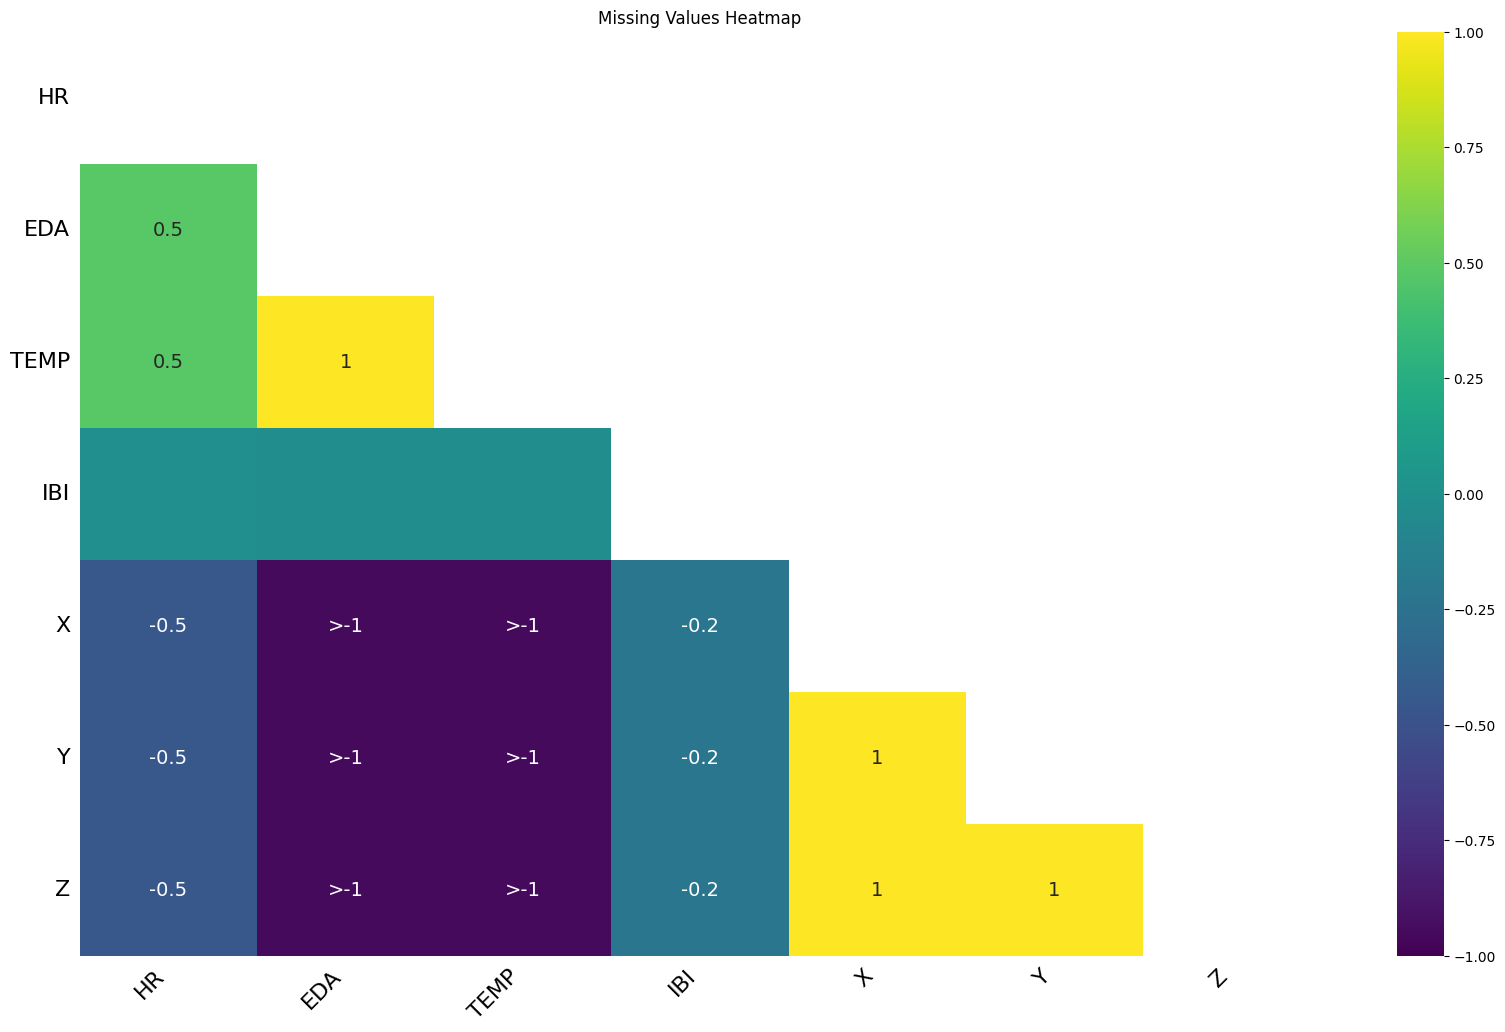

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Missing values heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(df, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()




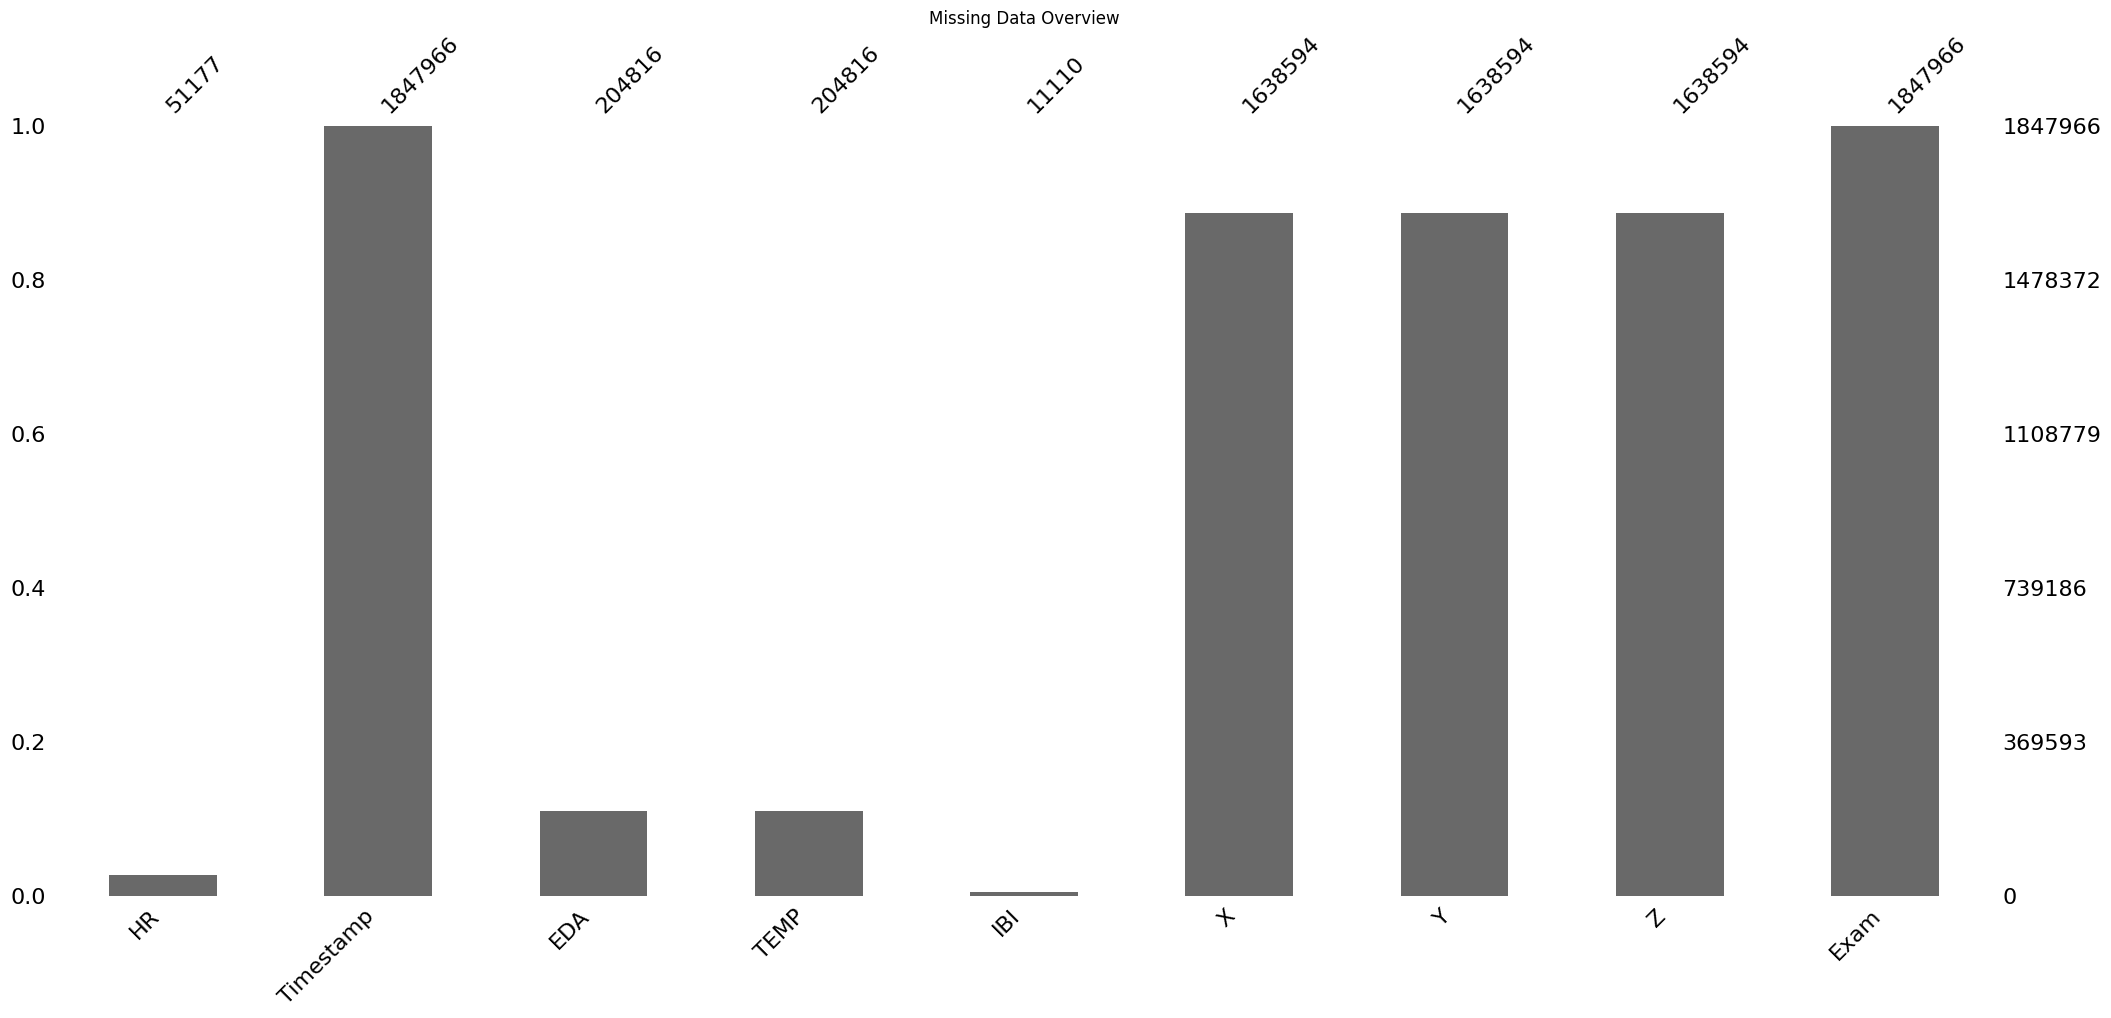

In [ ]:
# Missing values bar chart
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title("Missing Data Overview")
plt.show()

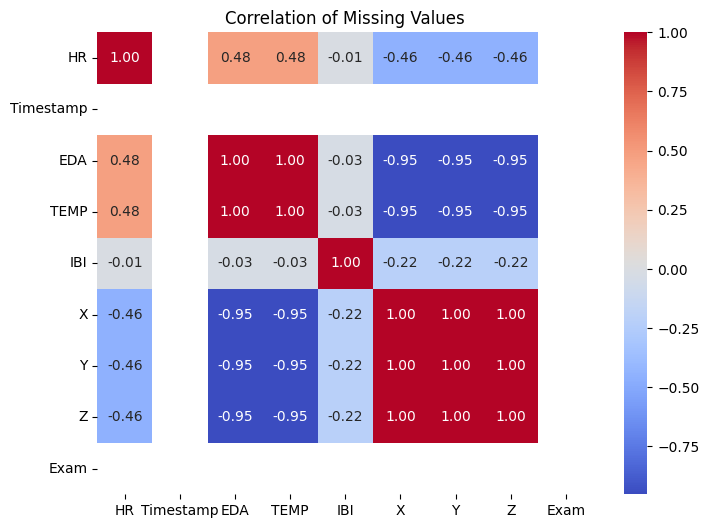

In [ ]:
import seaborn as sns

# Create a missing indicator matrix
missing_indicators = df.isnull().astype(int)

# Compute correlation
corr_matrix = missing_indicators.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Missing Values")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the merged dataset
file_path = "/content/drive/MyDrive/data/S2/Final_Merged_Dataset.csv"
df = pd.read_csv(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Fill missing values using forward fill then backward fill (updated syntax)
df_imputed = df.ffill().bfill()

# Further impute numerical columns using KNN imputation
num_cols = ['HR', 'EDA', 'TEMP', 'IBI', 'X', 'Y', 'Z']
imputer = KNNImputer(n_neighbors=5)
df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])

# Cap outliers using the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

for col in num_cols:
    df_imputed[col] = cap_outliers(df_imputed[col])

# Save the final preprocessed dataset
output_path = "/content/drive/MyDrive/data/S2/Final_Preprocessed_Dataset.csv"
df_imputed.to_csv(output_path, index=False)
print("✅ Final preprocessed dataset saved at:", output_path)


✅ Final preprocessed dataset saved at: /content/drive/MyDrive/data/S2/Final_Preprocessed_Dataset.csv


1. Raw Data and Merging
Data Sources:
We started with raw sensor files for each exam session (Midterm 1, Midterm 2, and Final) for a student. Each exam folder contained several CSV files for different sensors:

HR.csv, EDA.csv, TEMP.csv:
The first row contains the session’s starting Unix timestamp, and the second row contains the sampling rate (Hz). The remaining rows are sensor measurements.
ACC.csv:
Contains three columns (X, Y, Z) recording 3-axis accelerometer data; it follows the same metadata structure.
IBI.csv:
Contains two columns: the first is the time offset (in seconds) relative to the session start (obtained from the HR file) and the second is the IBI value.
Other files (e.g., tags.csv, BVP.csv, info.txt) were not used in the merging process.
Processing Individual Files:
For each sensor file, we:

Extracted the start time and sample rate from the first two rows.
Computed accurate timestamps for each measurement using the metadata.
Renamed columns appropriately (e.g., HR, EDA, TEMP for single-value sensors; X, Y, Z for accelerometer data).
For IBI, we used the HR file’s start time (since it doesn’t include its own sampling rate) and converted the time offsets into absolute timestamps (rounded to the nearest second).
Merging by Exam Session:
For each exam (Midterm 1, Midterm 2, and Final), the processed sensor datasets were merged using an outer join on the Timestamp field. The timestamps were rounded to a 1-second grid and the merged data was grouped by timestamp to ensure one row per second. Each row was also labeled with the corresponding exam type.

Final Merged Dataset:
All exam sessions were then concatenated into one dataset, which is saved as Final_Merged_Dataset.csv (or, for Student 2, in your case, as saved in /content/drive/MyDrive/data/S2/Final_Merged_Dataset.csv). This dataset contains data from all sensors along with an "Exam" column indicating the session (e.g., "Midterm 1", "Midterm 2", "Final").

2. Missing Data Analysis and Imputation
Missing Values Summary:
After merging, we observed that a high percentage of missing values existed in columns such as HR (~97%), EDA (~89%), TEMP (~89%), and IBI (~99%). This is common when merging sensors with different sampling frequencies, as they may not align perfectly in time.

Imputation Strategy:
To create a continuous, complete time series for analysis:

Forward Fill and Backward Fill:
We first applied forward-fill (ffill()) and backward-fill (bfill()) to propagate available values across missing intervals, preserving time continuity.
KNN Imputation:
Then, for the key numerical columns (HR, EDA, TEMP, IBI, X, Y, Z), we applied KNN imputation (with 5 neighbors) to further refine the imputation by considering similar observations.
This two-step approach minimized missing values in the dataset.

3. Outlier Handling
Outlier Detection:
Outliers were assessed using the Interquartile Range (IQR) method for each numerical column. This method calculates the lower and upper bounds as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively.

Outlier Capping:
Instead of removing outliers, we applied Winsorization (capping) by clipping values outside the calculated bounds. This keeps extreme values in check while preserving all data points.

4. Final Preprocessing Outcome
The final preprocessed dataset now has:
All missing values imputed using a combination of ffill/bfill and KNN imputation.
Outliers capped based on the IQR method.
Timestamps aligned to a consistent 1-second grid.
Data merged across all exam sessions with an "Exam" label.
This cleaned dataset is saved as Final_Preprocessed_Dataset.csv and is ready for further steps such as feature engineering and modeling.


# explained


Type of Missing Data:

The high missing percentages in HR, EDA, TEMP, and IBI primarily result from asynchronous sampling—the sensors record at different frequencies and time windows. This leads to many time points where one sensor has data while another does not.
This pattern is generally Missing At Random (MAR) because the missingness is due to how the data was collected (different sampling rates and timing), not because of some systematic error in the measurements themselves.
Why KNN Imputation?

We chose KNN imputation because it leverages the similarity among observations across multiple features. In our dataset, even though many values were missing due to timing differences, there is still structure in the data that KNN can use to estimate missing values more accurately than simple mean or median imputation.
Downsampling/Resampling:

Since sensors like EDA, TEMP, and ACC are sampled at much higher frequencies than HR, we needed to align them on a common time grid.
This was done by rounding all timestamps to the nearest second and then grouping by Timestamp (using the mean of values) to produce a 1‑Hz time series. This step ensures that all sensor measurements are synchronized in time for subsequent analysis.
Why Not Exclude Outliers?

Excluding outliers outright can remove important extreme values that might represent genuine physiological responses.
Instead, we chose to cap outliers using the IQR method (Winsorization). This approach limits extreme values while retaining the overall distribution and preserving all data points for analysis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the final preprocessed dataset (with missing values imputed and outliers capped)
input_path = "/content/drive/MyDrive/data/S2/Final_Preprocessed_Dataset.csv"
df = pd.read_csv(input_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values("Timestamp").reset_index(drop=True)

# Define numerical columns for scaling
num_cols = ['HR', 'EDA', 'TEMP', 'IBI', 'X', 'Y', 'Z']

# Initialize StandardScaler and scale numerical features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Save the final scaled dataset
output_scaled_path = "/content/drive/MyDrive/data/S2/Final_Preprocessed_Scaled_Dataset.csv"
df_scaled.to_csv(output_scaled_path, index=False)
print("✅ Final scaled dataset saved at:", output_scaled_path)


✅ Final scaled dataset saved at: /content/drive/MyDrive/data/S2/Final_Preprocessed_Scaled_Dataset.csv


Normalization/Scaling:

Why?
The physiological sensors capture values on different scales (for example, HR might be in beats per minute while accelerometer readings are in fractions of g). Many machine learning algorithms perform better when features are on a similar scale.
How?
We use the StandardScaler from scikit-learn to standardize each numerical feature so that they have a mean of 0 and a standard deviation of 1.
Sorting & Saving:

We sort the dataset by the Timestamp to ensure the time-series order is preserved.
The final dataset, now scaled and complete, is saved as Final_Preprocessed_Scaled_Dataset.csv. This dataset is now fully preprocessed and ready for feature engineering and modeling.

Heart Rate Variability (HRV):

Kim, H.G., Cheon, E.J., Bai, D.S., Lee, Y.H., & Koo, B.H. (2018). Stress and Heart Rate Variability: A Meta-Analysis and Review of the Literature.
This paper provides an in-depth review of HRV as a reliable marker of stress, explaining that changes in HRV reflect autonomic nervous system balance and are associated with cognitive and emotional stress.
link :- https://pubmed.ncbi.nlm.nih.gov/29486547/


Electrodermal Activity (EDA):

Critchley, H.D. (2002). Electrodermal responses: what happens in the brain?
This review discusses how EDA is linked to emotional processing and stress, making it a valuable index for assessing sympathetic nervous system activity.

link https://pubmed.ncbi.nlm.nih.gov/11954558/


Skin Temperature:

Kreibig, S.D. (2010). Autonomic nervous system activity in emotion: A review.
This article reviews various physiological markers of emotion, including skin temperature, and explains how these measures can change under stress.

link https://pubmed.ncbi.nlm.nih.gov/20371374/


Accelerometer Data for Stress Detection:

Healey, J., & Picard, R.W. (2005). Detecting stress during real-world driving tasks using physiological sensors.
This study demonstrates that motion patterns captured by accelerometers can provide insight into behavioral responses to stress.
link https://ieeexplore.ieee.org/document/1438384



Collectively, these references justify our feature engineering approach:

HRV (calculated via rolling mean and standard deviation of HR or IBI) is used because it captures the dynamic balance between sympathetic and parasympathetic nervous system activity, a known stress indicator.
EDA features (such as moving averages and variability) capture the skin’s conductance response, which correlates with emotional arousal and stress.
Skin Temperature features are included because temperature can change with stress, reflecting alterations in blood flow and thermoregulation.
Accelerometer data (vector magnitude and its variability) provides information on physical movement and restlessness, which are often linked to stress and anxiety.

Our research question is:
"How do physiological stress levels during an exam impact student performance, and can we predict exam scores based on these stress indicators?"

To answer this, we need to extract features that capture stress responses from the sensor data. For example:

Heart Rate (HR) Variability:
Variations in heart rate can indicate stress. A higher variability sometimes reflects a relaxed state, but under stress, the pattern may change. We compute rolling mean and standard deviation (as an approximation for HR variability).

Electrodermal Activity (EDA):
EDA reflects changes in skin conductance due to sweating—a known marker of arousal or stress. We compute rolling averages and variability.

link https://pubmed.ncbi.nlm.nih.gov/11954558/

Temperature (TEMP):
Skin temperature may shift during stress. Rolling averages help capture these trends.

Accelerometer (ACC) Data:
Movement (captured via 3-axis accelerometer data) can be a proxy for nervousness or restlessness. We compute the vector magnitude (√(X²+Y²+Z²)) and then its rolling mean and standard deviation to summarize overall activity.

These engineered features are directly related to stress physiology. In subsequent modeling steps, these features may be used to predict exam performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed and scaled dataset
input_path = "/content/drive/MyDrive/data/S2/Final_Preprocessed_Scaled_Dataset.csv"
df = pd.read_csv(input_path, parse_dates=["Timestamp"])
df.sort_values("Timestamp", inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
window = 30

In [ ]:
# --- Heart Rate Features ---
# Rolling mean (average HR over 30 sec) and standard deviation (proxy for HR variability)
df["HR_mean"] = df["HR"].rolling(window=window, min_periods=1).mean()
df["HR_std"] = df["HR"].rolling(window=window, min_periods=1).std()

In [ ]:
# --- Electrodermal Activity (EDA) Features ---
# Rolling mean and standard deviation capture overall arousal levels and variability
df["EDA_mean"] = df["EDA"].rolling(window=window, min_periods=1).mean()
df["EDA_std"] = df["EDA"].rolling(window=window, min_periods=1).std()

In [ ]:

# --- Temperature (TEMP) Features ---
# Rolling statistics help detect trends and fluctuations in skin temperature
df["TEMP_mean"] = df["TEMP"].rolling(window=window, min_periods=1).mean()
df["TEMP_std"] = df["TEMP"].rolling(window=window, min_periods=1).std()


In [ ]:
# --- Accelerometer (ACC) Features ---
# Calculate vector magnitude from X, Y, Z as an overall measure of movement
df["ACC_mag"] = np.sqrt(df["X"]**2 + df["Y"]**2 + df["Z"]**2)
df["ACC_mag_mean"] = df["ACC_mag"].rolling(window=window, min_periods=1).mean()
df["ACC_mag_std"] = df["ACC_mag"].rolling(window=window, min_periods=1).std()

In [ ]:
# --- IBI Features ---
# Rolling mean and standard deviation for IBI can capture changes in heart beat intervals (HRV)
df["IBI_mean"] = df["IBI"].rolling(window=window, min_periods=1).mean()
df["IBI_std"] = df["IBI"].rolling(window=window, min_periods=1).std()

In [ ]:
# Save the dataset with engineered features
output_featured_path = "/content/drive/MyDrive/data/S2/Final_Featured_Dataset.csv"
df.to_csv(output_featured_path, index=False)
print("✅ Final dataset with engineered features saved at:", output_featured_path)

✅ Final dataset with engineered features saved at: /content/drive/MyDrive/data/S2/Final_Featured_Dataset.csv


Explanation of Feature Engineering Steps
Heart Rate Features (HR_mean, HR_std):

Why? Heart rate variability is a well-established indicator of stress. A high variability under certain conditions may indicate a relaxed state, while lower variability can be a sign of stress.
How? We compute the rolling mean to capture average HR over a 30‑second window and the rolling standard deviation as a proxy for HR variability.
EDA Features (EDA_mean, EDA_std):

Why? EDA reflects changes in skin conductance linked to sweating, which increases with stress.
How? Rolling averages and standard deviations of EDA over 30 seconds capture both the overall arousal level and the variability that may indicate stress spikes.
Temperature Features (TEMP_mean, TEMP_std):

Why? Skin temperature can shift in response to stress, reflecting changes in blood flow and metabolic activity.
How? We use a 30‑second rolling window to smooth out transient fluctuations and highlight longer-term trends.
Accelerometer Features (ACC_mag, ACC_mag_mean, ACC_mag_std):

Why? Movement or restlessness (captured by the accelerometer) can indicate nervousness or agitation, which are common stress responses.
How? We first compute the vector magnitude of the three axes (X, Y, Z) to summarize overall movement. Then, we compute rolling statistics to capture the dynamics of movement.
IBI Features (IBI_mean, IBI_std):

Why? The variability in inter-beat intervals (IBI) is another indicator of stress (heart rate variability).
How? Rolling mean and standard deviation of IBI provide insights into how the timing between heartbeats changes over time.
These features are designed to capture the physiological responses to stress. They are directly related to our research question about how stress levels during an exam impact performance. Once we have these features, they can be used in predictive models to explore and possibly predict exam scores.

Our research question is:
"How do physiological stress levels during an exam impact student performance, and can we predict exam scores based on these stress indicators?"

Our engineered features (e.g., HR_mean, HR_std, EDA_mean, EDA_std, etc.) capture dynamic physiological signals over time. To use these in prediction models, we need to ensure the time series are well-behaved and to understand their temporal patterns. The key steps include:

Stationarity Check:

What & Why:
We test if the time series (e.g., HR_std or EDA_mean) have a constant mean and variance over time. Many time series models (e.g., ARIMA) assume stationarity.
How:
Use the Augmented Dickey-Fuller (ADF) test to check for stationarity. If the p-value is low (typically < 0.05), the series is stationary.
ACF and PACF Plots:

What & Why:
Autocorrelation (ACF) and partial autocorrelation (PACF) plots help us understand temporal dependencies in the data. This can guide model selection (e.g., identifying AR and MA orders for an ARIMA model).
Time Series Modeling for Prediction:

Once the time series properties are understood, we can build predictive models. For example, if our series are stationary (or can be made stationary), we could apply ARIMA models or even simpler regression models that incorporate temporal features to predict exam scores.
Alternatively, if more complexity is needed, deep learning models (like LSTM) can capture temporal dynamics

In our next steps, we’ll perform some simple tests (like the ADF test) and plot ACF/PACF for a key feature. This will help ensure the data is ready for time series modeling.

In [ ]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
input_path = "/content/drive/MyDrive/data/S2/Final_Featured_Dataset.csv"
df = pd.read_csv(input_path, parse_dates=["Timestamp"])
df.sort_values("Timestamp", inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset (update path as needed)
file_path = "/content/drive/MyDrive/data/S2/Final_Featured_Dataset.csv"
df = pd.read_csv(file_path, parse_dates=["Timestamp"])
df.sort_values("Timestamp", inplace=True)
df.reset_index(drop=True, inplace=True)

# Example: Using the EDA_mean feature for stationarity analysis
# (If you haven't computed EDA_mean yet, you can use EDA directly.)
if "EDA_mean" not in df.columns:
    df["EDA_mean"] = df["EDA"]

time_series = df.set_index("Timestamp")["EDA_mean"]

# 1. Check stationarity using the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(time_series.dropna())
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])
if adf_result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("⚠️ The series is not stationary. Differencing or detrending may be needed.")

# 2. Plot the time series
plt.figure(figsize=(12,6))
plt.plot(time_series.index, time_series, label="EDA_mean")
plt.title("Time Series of EDA_mean")
plt.xlabel("Timestamp")
plt.ylabel("EDA_mean")
plt.legend()
plt.show()

# 3. Plot ACF and PACF
plt.figure(figsize=(12,5))
plot_acf(time_series.dropna(), lags=50, alpha=0.05)
plt.title("ACF of EDA_mean")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(time_series.dropna(), lags=50, alpha=0.05, method="ywm")
plt.title("PACF of EDA_mean")
plt.show()